In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
data = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
data.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<function matplotlib.pyplot.show(*args, **kw)>

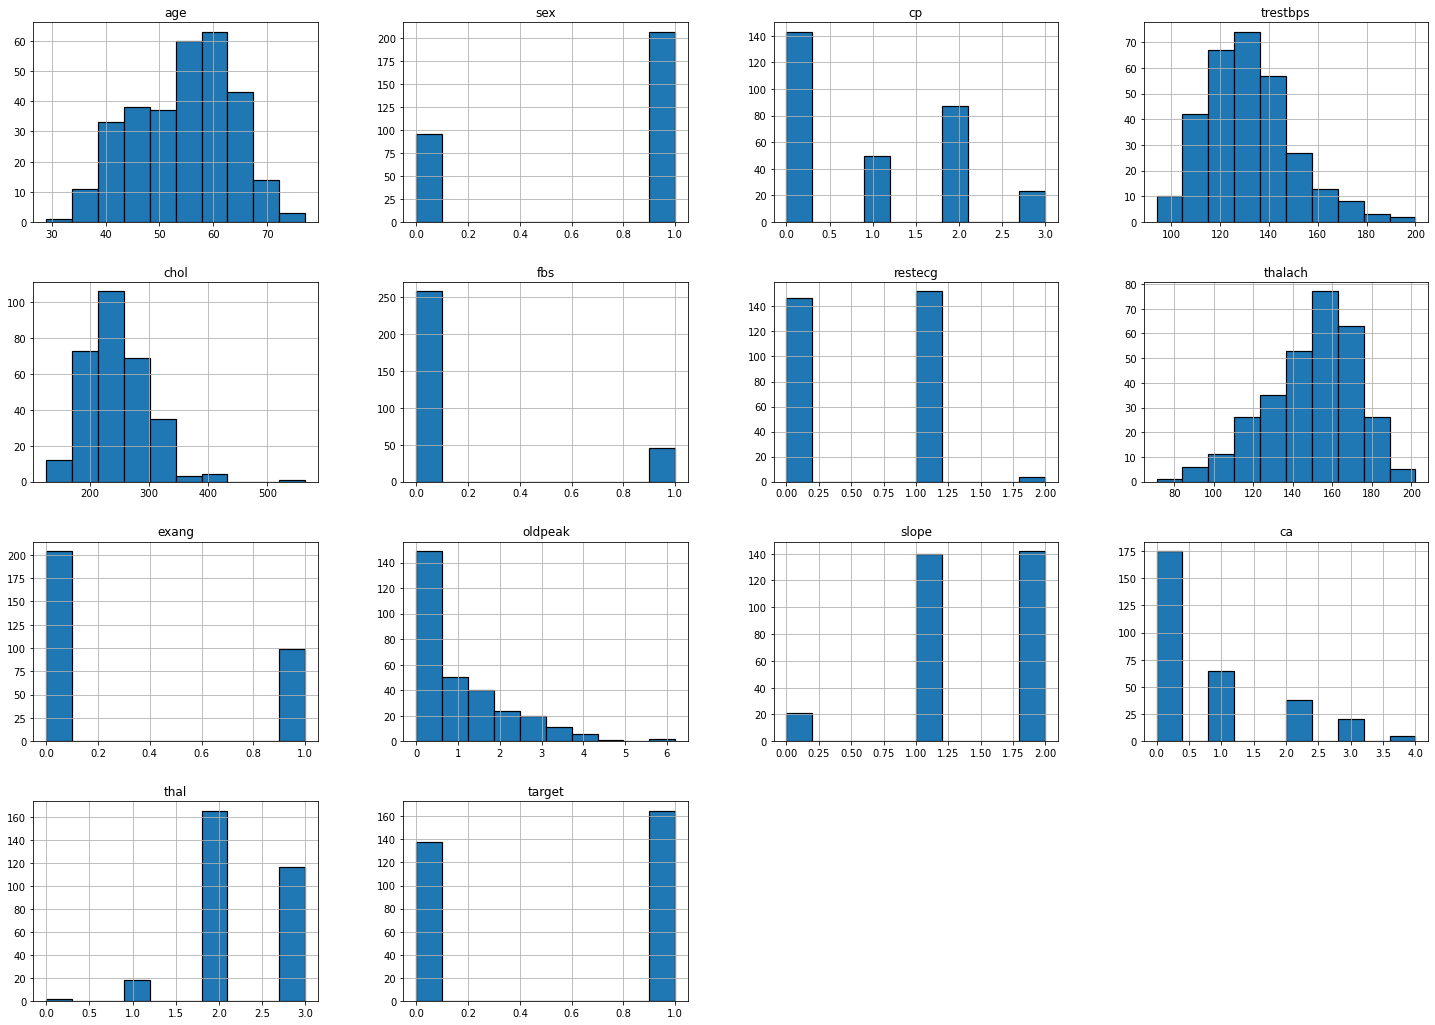

In [4]:
import matplotlib.pyplot as plt
data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,18)
plt.show

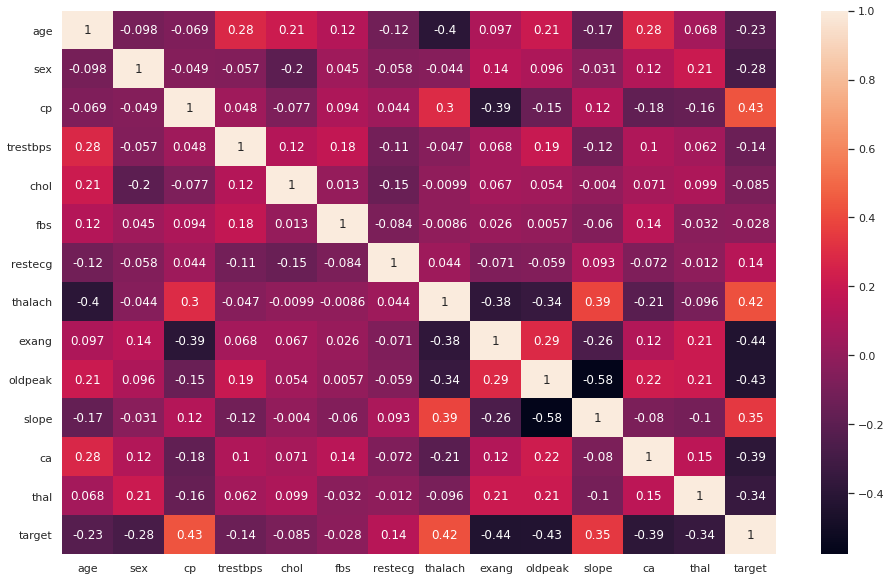

In [5]:
# using heatmap getting an idea of correlation between the features of the dataset
import seaborn as sns
sns.set()
plt.figure(figsize = (16,10))
sns.heatmap(data.loc[:, ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].corr(),
    annot=True)

Text(0, 0.5, 'Frequency')

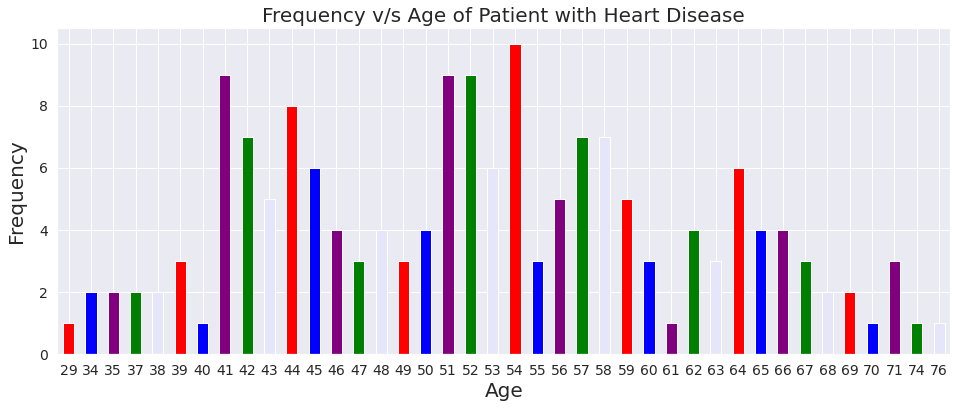

In [6]:
# getting idea about the frequency of Age of the Patients with Heart Disease
ax = data[data['target']==1]['age'].value_counts().sort_index().plot.bar(
    figsize = (16,6),
    fontsize = 14,
    title = 'Frequency v/s Age of Patient with Heart Disease',
    rot=0,
    color = ['red', 'blue', 'purple', 'green', 'lavender'],
)
ax.set_title('Frequency v/s Age of Patient with Heart Disease', fontsize=20)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)

Text(0, 0.5, 'Frequency')

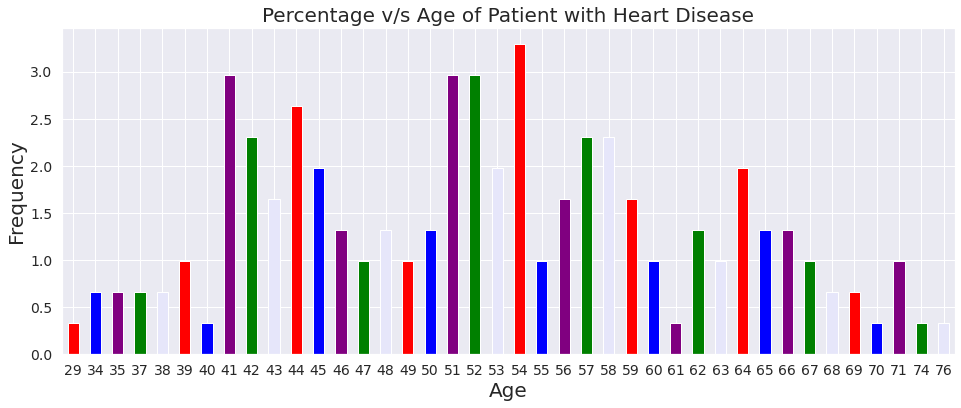

In [7]:
# getting idea about the percentage of Age of the Patients with Heart Disease
ax = ((data[data['target']==1]['age'].value_counts()/ len(data)) * 100).sort_index().plot.bar(
    figsize = (16,6),
    fontsize = 14,
    title = 'Percentage v/s Age of Patient with Heart Disease',
    rot=0,
    color = ['red', 'blue', 'purple', 'green', 'lavender'],
)
ax.set_title('Percentage v/s Age of Patient with Heart Disease', fontsize=20)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)

In [8]:
# Separating the Inputs and the Outputs from the data
X = data.drop(['target'], axis=1)
y = data['target']
X.head(), y.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

In [9]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
# Scaling the training data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_predicted = log_reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_predicted))
log_reg.score(X_test, y_test)

MAE: 0.14754098360655737


0.8524590163934426

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
log_Reg_cm = confusion_matrix(y_test, y_predicted)
log_Reg_cm

array([[25,  4],
       [ 5, 27]])

In [13]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=7, max_depth=4, class_weight={0:sum(y_train==0),1:sum(y_train==1)})
rand_forest.fit(X_train, y_train)
y_predicted = rand_forest.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_predicted))
rand_forest.score(X_test, y_test)

MAE: 0.13114754098360656


0.8688524590163934

In [14]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf = GradientBoostingClassifier()
grad_boost_clf.fit(X_train, y_train)
y_predicted = grad_boost_clf.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_predicted))
grad_boost_clf.score(X_test, y_test)

MAE: 0.21311475409836064


0.7868852459016393

In [15]:
# Support Vector Classifier
from sklearn.svm import SVC 
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train,y_train)
y_predicted = svc.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_predicted))
svc.score(X_test, y_test)

MAE: 0.13114754098360656


0.8688524590163934

In [16]:
# Model using Dummy Variables
X = data.drop(['target'], axis=1)
y = data['target']
X.head(), y.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

In [17]:
#Encode the catergorical data in the features data
X_encoded = pd.get_dummies(data, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size=0.2)

In [19]:
std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [20]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_predicted = log_reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_predicted))
log_reg.score(X_test, y_test)

MAE: 0.0


1.0

In [21]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
y_predicted = rand_forest.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_predicted))
rand_forest.score(X_test, y_test)

MAE: 0.0


1.0

In [22]:
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train,y_train)
y_predicted = svc.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_predicted))
svc.score(X_test, y_test)

MAE: 0.0


1.0

In [23]:
grad_boost_clf = GradientBoostingClassifier()
grad_boost_clf.fit(X_train, y_train)
y_predicted = grad_boost_clf.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_predicted))
grad_boost_clf.score(X_test, y_test)

MAE: 0.0


1.0

In [24]:
# So as we can see after using Dummy variables we have almost overfitted every Model.
# So we can conclude that the Model works fine without Dummy variables and
# we get accuracy of 86.88% with Random Forest Classifier and SVC